In [5]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit import BasicAer
# Loading your IBM Q account(s)
provider = IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q-internal', 'deployed', 'default')

ibmqfactory.load_account:WARNING:2021-10-02 20:25:39,391: Credentials are already in use. The existing account in the session will be replaced.


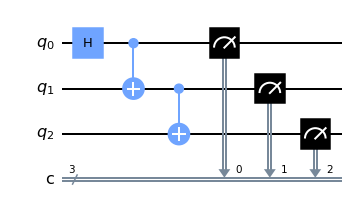

In [2]:
from qiskit import(
  QuantumCircuit,
  execute,
  Aer)

circuit = QuantumCircuit(3, 3)

circuit.h(0)
circuit.cx(0, 1)
circuit.cx(1, 2)
circuit.measure([0,1,2], [0,1,2])

circuit.draw()

In [8]:
#pick a device to run on

backend = provider.get_backend('ibmq_jakarta')
# backend = BasicAer.get_backend('qasm_simulator')

shots = 2048

# Execute the circuit on the backend
job = execute(circuit, backend, shots=shots, memory=True)

# Grab results from the job
result = job.result()

#get individual shots
memory = result.get_memory()

# need an array to drop all the results into
outputArray = []

#convert results to int and drop into array
for x in range(0, shots):
    outputArray.append(memory[x])
    
print(outputArray)

['111', '000', '000', '000', '000', '011', '111', '111', '111', '111', '111', '000', '000', '111', '111', '000', '000', '111', '000', '111', '111', '000', '111', '111', '111', '000', '111', '000', '111', '000', '000', '000', '000', '000', '000', '111', '000', '000', '111', '000', '000', '000', '000', '111', '000', '000', '111', '000', '000', '111', '111', '000', '000', '000', '000', '111', '111', '000', '001', '111', '111', '000', '000', '000', '111', '000', '111', '111', '000', '001', '111', '000', '111', '000', '000', '111', '000', '111', '111', '000', '001', '111', '111', '111', '111', '101', '000', '000', '000', '000', '000', '000', '000', '111', '000', '000', '111', '000', '111', '000', '000', '111', '111', '000', '111', '111', '111', '111', '101', '000', '000', '111', '111', '111', '111', '110', '000', '000', '111', '111', '000', '111', '111', '000', '000', '000', '000', '111', '111', '111', '111', '000', '111', '000', '111', '000', '000', '000', '111', '011', '111', '000', '000'

In [4]:
%%capture cap --no-stderr
print(outputArray)

In [5]:
with open('GHZ-jakarta.txt', 'w') as f:
    f.write(cap.stdout)